## Kaggle の　Cost of Living Index by Country　を分析

In [23]:
import pandas as pd
import io

#データを読み込む
input_data = pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv")

In [24]:
input_data.head(10)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3
9,10,Australia,70.2,33.4,52.5,77.3,62.5,127.4


In [25]:
input_data.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


## 単回帰分析

傾き= 0.2827 切片= 25.1548 信頼係数= 0.6927 p値= 0.0 標準誤差= 0.027


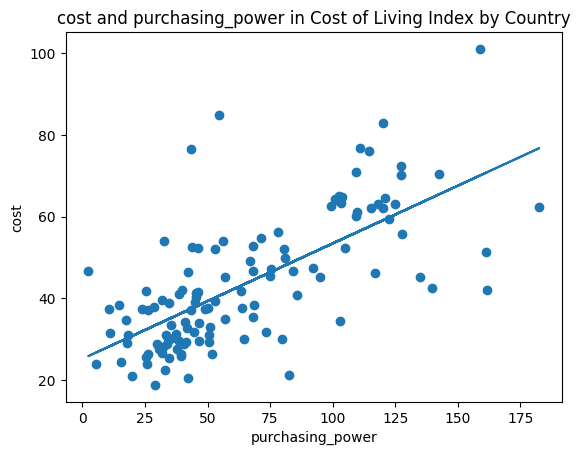

In [26]:
import matplotlib.pyplot as plt
import scipy.stats

#利用する変数を取り出す
cost=input_data["Cost of Living Index"]
rent=input_data["Rent Index"]
cost_rent=input_data["Cost of Living Plus Rent Index"]
groceries=input_data["Groceries Index"]
restaurant=input_data["Restaurant Price Index"]
purchasing_power=input_data["Local Purchasing Power Index"]

#単回帰を行う
#costと, purchasing_powerについて回帰する
result = scipy.stats.linregress(purchasing_power,cost)
print('傾き=', result.slope.round(4), '切片=', result.intercept.round(4), '信頼係数=', result.rvalue.round(4), 'p値=', result.pvalue.round(4), '標準誤差=', result.stderr.round(4))
result_slope = result.slope
result_intercept = result.intercept

#散布図にプロットする. x軸をレビュー数にして, 縦軸を価格にする
plt.plot(purchasing_power, [result_slope * u + result_intercept for u in purchasing_power])
plt.scatter(purchasing_power,cost)
plt.title('cost and purchasing_power in Cost of Living Index by Country')
plt.ylabel('cost')
plt.xlabel('purchasing_power')
plt.show()

In [27]:
#単回帰分析を実行してみる
#costに対してpurchasing_powerがプラスに寄与することが確認できる

import statsmodels.api as sm
model = sm.OLS(input_data["Cost of Living Index"], sm.add_constant(input_data["Local Purchasing Power Index"]))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)

                             OLS Regression Results                             
Dep. Variable:     Cost of Living Index   R-squared:                       0.480
Model:                              OLS   Adj. R-squared:                  0.475
Method:                   Least Squares   F-statistic:                     109.8
Date:                  Thu, 12 Sep 2024   Prob (F-statistic):           1.35e-18
Time:                          09:28:07   Log-Likelihood:                -468.24
No. Observations:                   121   AIC:                             940.5
Df Residuals:                       119   BIC:                             946.1
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

## 重回帰分析

<Axes: >

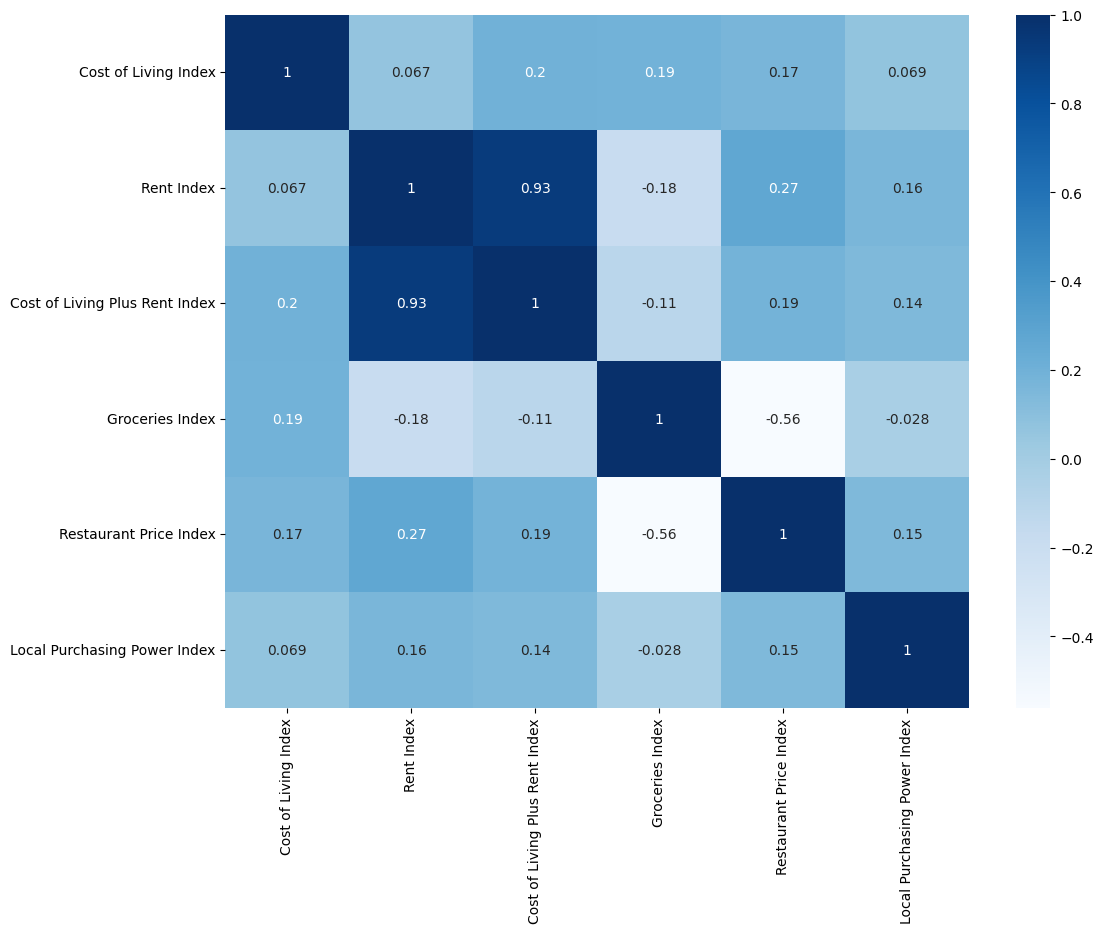

In [28]:
#相関係数を確認
import seaborn as sns
plt.figure(figsize=(12, 9))
equation_df=pd.concat([cost, rent, cost_rent, groceries, restaurant, purchasing_power], axis=1)
sns.heatmap(equation_df.pct_change().corr(), annot=True, cmap='Blues')

In [29]:
#モデルで利用する変数を接合し, ひとつの DataFrame にする
#読み込むデータを変えれば, 説明変数や被説明変数を変えることが可能
x_list = pd.concat([input_data["Cost of Living Index"], input_data["Rent Index"],input_data["Cost of Living Plus Rent Index"], input_data["Groceries Index"], input_data["Restaurant Price Index"], input_data["Local Purchasing Power Index"]], axis=1)

x_list2 = x_list.drop("Cost of Living Index", axis=1)
cost = input_data["Cost of Living Index"]

#重回帰分析の結果を表示する
model = sm.OLS(cost, sm.add_constant(x_list2))
result =model.fit()
print(result.summary())
print(result.pvalues)

                             OLS Regression Results                             
Dep. Variable:     Cost of Living Index   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 1.270e+06
Date:                  Thu, 12 Sep 2024   Prob (F-statistic):          7.28e-271
Time:                          09:28:20   Log-Likelihood:                 152.81
No. Observations:                   121   AIC:                            -293.6
Df Residuals:                       115   BIC:                            -276.9
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

## 多重共線性のチェック

In [30]:
#多重共線性が発生していないか確認する
from statsmodels.stats.outliers_influence import *
num_cols = model.exog.shape[1]
print(num_cols) #説明変数の列数
vifs = [variance_inflation_factor(model.exog, i) for i in range(0, num_cols)]
pdv = pd.DataFrame(vifs, index=model.exog_names, columns=["VIF"])
print(pdv)

6
                                       VIF
const                            15.592614
Rent Index                       31.468476
Cost of Living Plus Rent Index  130.437986
Groceries Index                  18.242384
Restaurant Price Index           13.932605
Local Purchasing Power Index      2.110974


多重共線性が発生しているようですね。

モデルで使った変数間の散布図を観てみます。どれも、互いに相関があるようです。

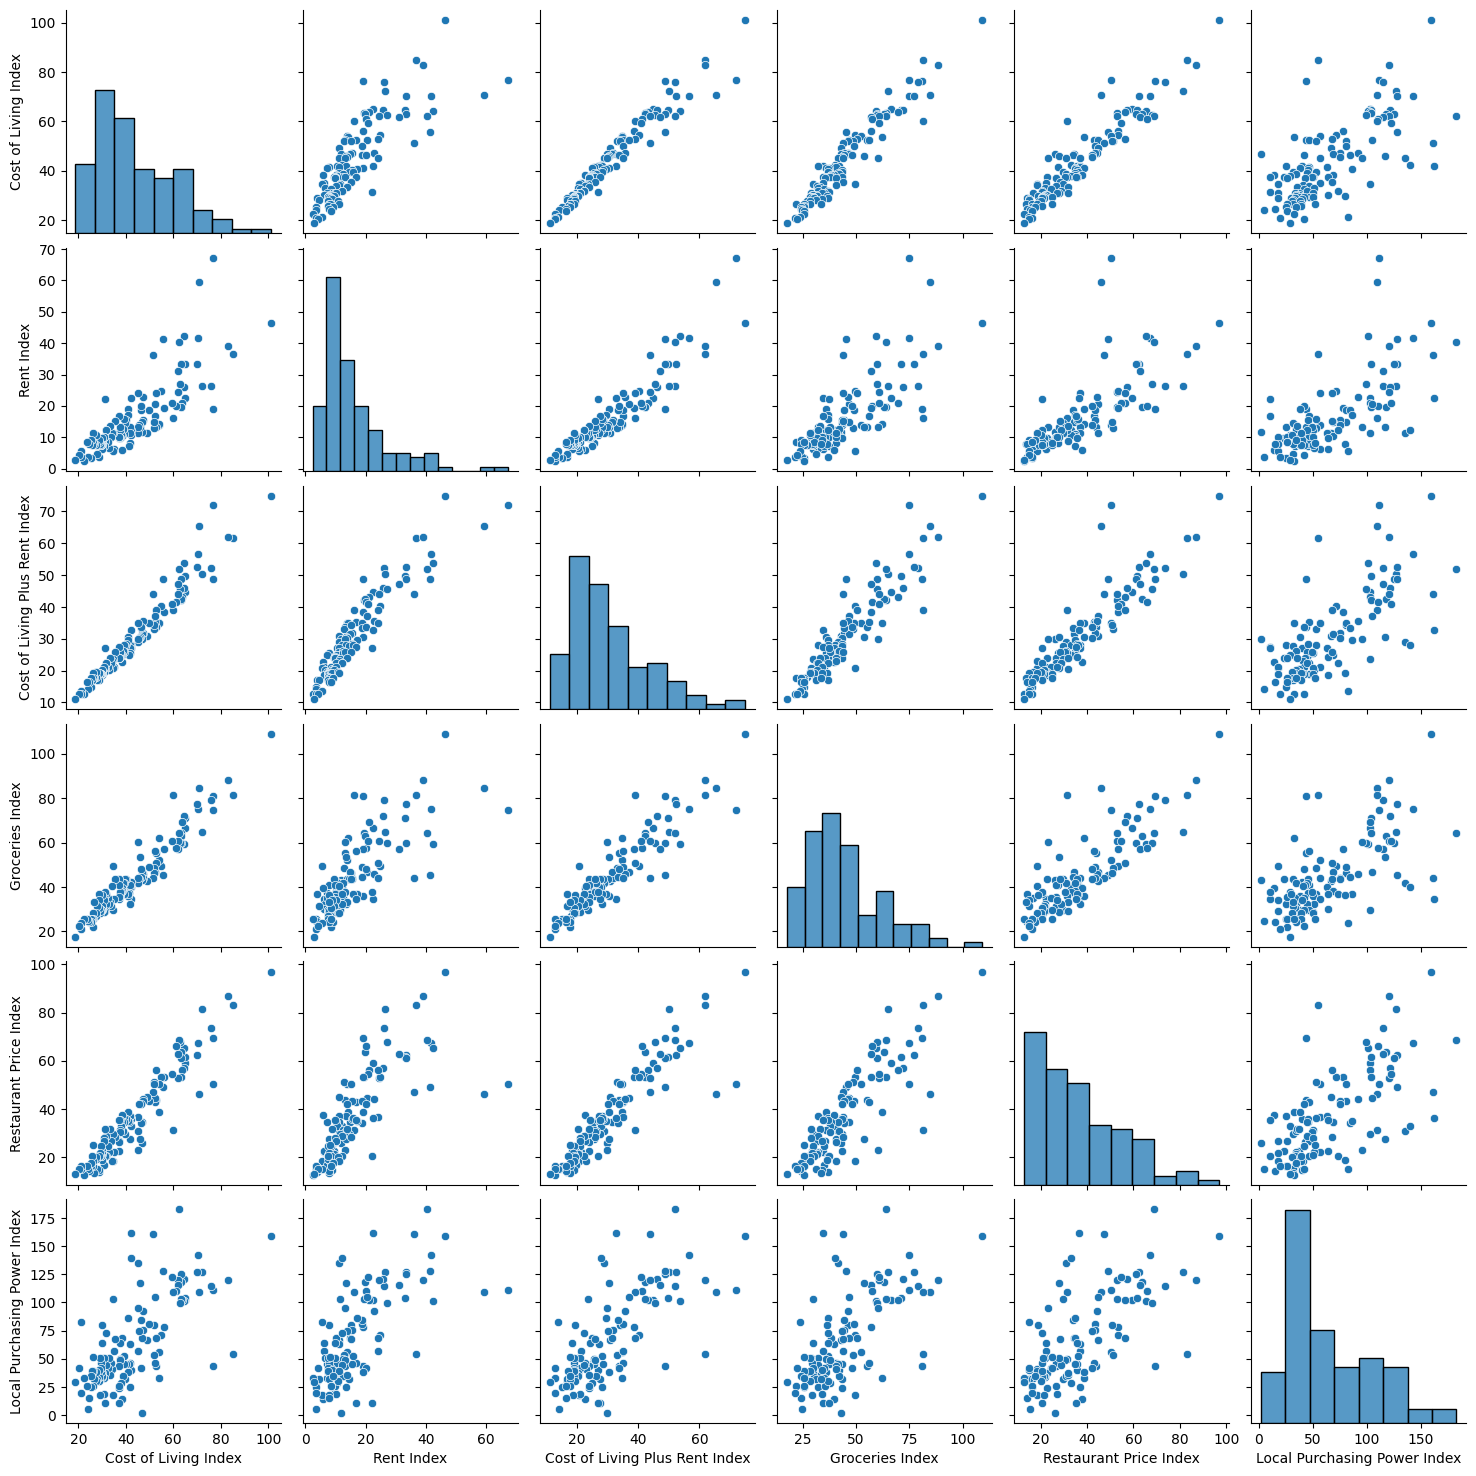

In [31]:
equation_df2=pd.concat([cost, rent, cost_rent, groceries, restaurant, purchasing_power], axis=1)
sns.pairplot(equation_df2)